<a href="https://colab.research.google.com/github/pawnzo90z/Work_colabs/blob/master/knowledge_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Colab Notebooks/for_google_notebook/knowladge_graph")

In [ ]:
os.listdir()

['sample_50_scraped_02.xlsx', 'Untitled0.ipynb']

In [ ]:
df1=pd.read_excel('sample_50_scraped_02.xlsx')

In [ ]:
df1.head(10)

,Unnamed: 0,url_linkedin,Name,Contact_details,About_details,Background_Title,Background_Company_Name,Background_Employment_Duration,Background_Location,Background_role,Background_Title_2,Background_Company_Name_2,Background_Employment_Duration_2,Background_Location_2,Background_role_2,Background_Title_3,Background_Company_Name_3,Background_Employment_Duration_3,Background_Location_3,Background_role_3,Background_Title_4,Background_Company_Name_4,Background_Employment_Duration_4,Background_Location_4,Background_role_4,Background_Title_5,Background_Company_Name_5,Background_Employment_Duration_5,Background_Location_5,Background_role_5,education_institute,education_Degree_Type,education_Field_of_study,education_years,education_institute_1,education_Degree_Type_1,education_Field_of_study_1,education_years_1,education_institute_2,education_Degree_Type_2,education_Field_of_study_2,education_years_2,liked_post,commented_post,posted,liked_hashtag,commented_hashtag,posted_hashtag,clean_posted,foi
0,0,https://www.linkedin.com/in/venkateswarlu-d-b14b9824,Venkateswarlu D,NaN," 13 solid years of experience in Technology Operations, Information Technology, Managing IT across the Enterprise with vast experience ranging from System and Network Infrastructure, Delivery Man...",Sr. IT Manager,"CARE, Quality CARE India limited",8 yrs 6 mos,"Hyderabad Area, India","o Data Backup & Restoring, Disaster Recovery Solutions",System / Network Administrator,vSplash,1 yr 7 mos,NaN,o Backup and Restore from Network-Attached Storages.,Sr. System Administrator,Lee Pharma Ltd,2 yrs 10 mos,NaN,"o Coordination with vendors, suppliers for IT related procurement.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nagarjuna University,BSC,Computers,2000 – 2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['engage informative motivate session build team performance col rajgopal founder transcendorg hospitals', '']",[],"['Irfan Dawood #Kudos I just wanted to say #ThankYou', 'Shaik Basha #Kudos I really appreciate all that you do #ThankYou', 'Shaik Basha #Kudos I really appreciate you #GoingAboveAndBeyond', 'Ravi ...","[['AMRI', 'Bhubaneswar', 'healthcare', 'health', 'Teamperformance'], ['TimeToDoBig', 'newyear2019']]",[],"[['Kudos', 'ThankYou'], ['Kudos', 'ThankYou'], ['Kudos', 'GoingAboveAndBeyond'], ['Kudos', 'ThankYou']]","['irfan dawood want', 'shaik basha appreciate', 'shaik basha appreciate', 'ravi kiran appreciate']",NaN
1,1,https://www.linkedin.com/in/vivek-digumarti-71929339,Vivek Digumarti,NaN,"Information Technology Leader with executive and hands-on experience in Global IT Transitions and Delivery, Technology Solutioning , System Integration, Software Development, Program Management, C...",IT Head,SAI Life Sciences Ltd (Formerly Sai Advantium Pharma Ltd),7 yrs 3 mos,NaN,NaN,Sr.Manager - IT,GENPACT,7 yrs 3 mos,NaN,NaN,JDEdwards Techno-Functional Consultant,Satyam Computers,1 yr 10 mos,NaN,NaN,JDEdwards Techno-Functional Consultant & Application Programmer,Hyundai Motor India Ltd,2 yrs 8 mos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian School of Business,NaN,NaN,NaN,Indian School of Business,Global CIO Certification Programme,NaN,NaN,"M.CT.M.Chidambaram Chettiyar School, Chennai",NaN,NaN,1991 – 1993,"['amazon hyderabad new campus inaugurate today. day', 'genpact come far years proud growth company. pleasure speak financial express india india lead financial publications journey genpact include...","['honor receive economic time cio award innovative work cloud compute annual conference. thank team wonderful work achieve recognition industry', 'receive best cyber lawyer 2018 2nd time month. go...",[],"[['AmazonHYDNewCampus'], ['GenpactCora', 'changingtheAInarrative'], [], [], ['DigitalPayments2018', 'TechnologySummit2018', 'Digital', 'Payments', 'Technology', 'Summit', 'Mumbai', 'November23', '...","[['etcio', 'evalueserve'], [], []]",[],[],NaN
2,2,https://www.linkedin.com/in/sivaprasad-mukku-67950841,Sivaprasad Mukku,NaN,NaN,Principal Systems Analyst,Hitachi Consulting,NaN,NaN,NaN,NaN,Na

In [ ]:
df_to_work = df1[["Name","Background_Title"]]

In [ ]:
df_to_work["Name"]

,Name,Background_Title
0,Venkateswarlu D,Sr. IT Manager
1,Vivek Digumarti,IT Head
2,Sivaprasad Mukku,Principal Systems Analyst
3,Manohar g,information systems
4,Karumanchi Suresh,Project Manager
5,Sujeet Kumar,Manager IT
6,Vivek Digumarti,IT Head
7,CHERUKURI SURESH,Vice President - IT Solutions
8,Devesh Kumar,Scientist
9,Sampath Manickam,Vice President - Data Center & Jio Media


In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
get_relation("Global Program Manager")

'Manager'

In [ ]:
for i in df1["Background_Title"]:
  print(i)

Sr. IT Manager
IT Head
Principal Systems Analyst
information systems
Project Manager
Manager IT
IT Head
Vice President - IT Solutions
Scientist
Vice President - Data Center & Jio Media
Head-SAP & Head-IT
Global Program Manager
Principal Systems Analyst
Sr. IT Manager
Manager Tech Arch
Vice President - Data Center & Jio Media
Network Lead
Senior Manager - IT
SCIENTIST - 'F'
Manager IT
GM, PMO
Manager
Asst. Manager-IT
Application Architect
Sr. Manager - IT Infrastructure
Senior Technology Specialist
Technology Architect (R&D - Digital Solutions), Manager
Vice President IT & CIO
Asst. Manager-IT
Project Manager - IT Infrastructure
Sr. Manager - IT Infrastructure
Global Program Manager
Technology Lead
Manager IT
Scientist
Vice President - IT Solutions
Vice President - IT Solutions
Vice President - IT Solutions
Application Architect
Tech Lead
Asst. Manager-IT
Application Architect
Senior Technical Associate
Sr. IT Manager
Manager
Sr. IT Manager
nan
Sr. Manager, Engineering IT
Information Se

In [ ]:
pd.Series(relations).value_counts()[:50]

Manager           10
IT                 8
Solutions          4
Infrastructure     4
Architect          4
Lead               3
Head               2
Scientist          2
Analyst            2
Center             2
Associate          1
Arch               1
Consultant         1
nan                1
Specialist         1
systems            1
SCIENTIST          1
SAP                1
GM                 1
dtype: int64

In [ ]:
relations = [get_relation(str(i)) for i in df1["Background_Title"]]
for i in range(len(df1["Background_Title"])):
  print("relaion:",relations[i],"  orignal:",df1["Background_Title"][i])

relaion: Manager   orignal: Sr. IT Manager
relaion: Head   orignal: IT Head
relaion: Analyst   orignal: Principal Systems Analyst
relaion: systems   orignal: information systems
relaion: Manager   orignal: Project Manager
relaion: IT   orignal: Manager IT
relaion: Head   orignal: IT Head
relaion: Solutions   orignal: Vice President - IT Solutions
relaion: Scientist   orignal: Scientist
relaion: Center   orignal: Vice President - Data Center & Jio Media
relaion: SAP   orignal: Head-SAP & Head-IT
relaion: Manager   orignal: Global Program Manager
relaion: Analyst   orignal: Principal Systems Analyst
relaion: Manager   orignal: Sr. IT Manager
relaion: Arch   orignal: Manager Tech Arch
relaion: Center   orignal: Vice President - Data Center & Jio Media
relaion: Lead   orignal: Network Lead
relaion: IT   orignal: Senior Manager - IT
relaion: SCIENTIST   orignal: SCIENTIST - 'F'
relaion: IT   orignal: Manager IT
relaion: GM   orignal: GM, PMO
relaion: Manager   orignal: Manager
relaion: IT  

In [ ]:

doc = nlp("Mayank khurana is a principal systems analyst")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Mayank ... amod
khurana ... nsubj
is ... ROOT
a ... det
principal ... amod
systems ... compound
analyst ... attr


In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("Mayank khurana is a principal systems analyst")

['Mayank  khurana', '']

In [ ]:
source = [str(i) for i in df_to_work["Name"]]
target = [str(i) for i in df_to_work["Background_Title"]]

In [ ]:
target

['Sr. IT Manager',
 'IT Head',
 'Principal Systems Analyst',
 'information systems',
 'Project Manager',
 'Manager IT',
 'IT Head',
 'Vice President - IT Solutions',
 'Scientist',
 'Vice President - Data Center & Jio Media',
 'Head-SAP & Head-IT',
 'Global Program Manager',
 'Principal Systems Analyst',
 'Sr. IT Manager',
 'Manager Tech Arch',
 'Vice President - Data Center & Jio Media',
 'Network Lead',
 'Senior Manager - IT',
 "SCIENTIST - 'F'",
 'Manager IT',
 'GM, PMO',
 'Manager',
 'Asst. Manager-IT',
 'Application Architect',
 'Sr. Manager - IT Infrastructure',
 'Senior Technology Specialist',
 'Technology Architect (R&D - Digital Solutions), Manager',
 'Vice President IT & CIO',
 'Asst. Manager-IT',
 'Project Manager - IT Infrastructure',
 'Sr. Manager - IT Infrastructure',
 'Global Program Manager',
 'Technology Lead',
 'Manager IT',
 'Scientist',
 'Vice President - IT Solutions',
 'Vice President - IT Solutions',
 'Vice President - IT Solutions',
 'Application Architect',
 'Te

In [ ]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
kg_df

,source,target,edge
0,Venkateswarlu D,Sr. IT Manager,Manager
1,Vivek Digumarti,IT Head,Head
2,Sivaprasad Mukku,Principal Systems Analyst,Analyst
3,Manohar g,information systems,systems
4,Karumanchi Suresh,Project Manager,Manager
5,Sujeet Kumar,Manager IT,IT
6,Vivek Digumarti,IT Head,Head
7,CHERUKURI SURESH,Vice President - IT Solutions,Solutions
8,Devesh Kumar,Scientist,Scientist
9,Sampath Manickam,Vice President - Data Center & Jio Media,Center


In [ ]:
G=nx.from_pandas_edgelist(df1, "Name", "Background_Company_Name",edge_attr=True, create_using=nx.MultiDiGraph())

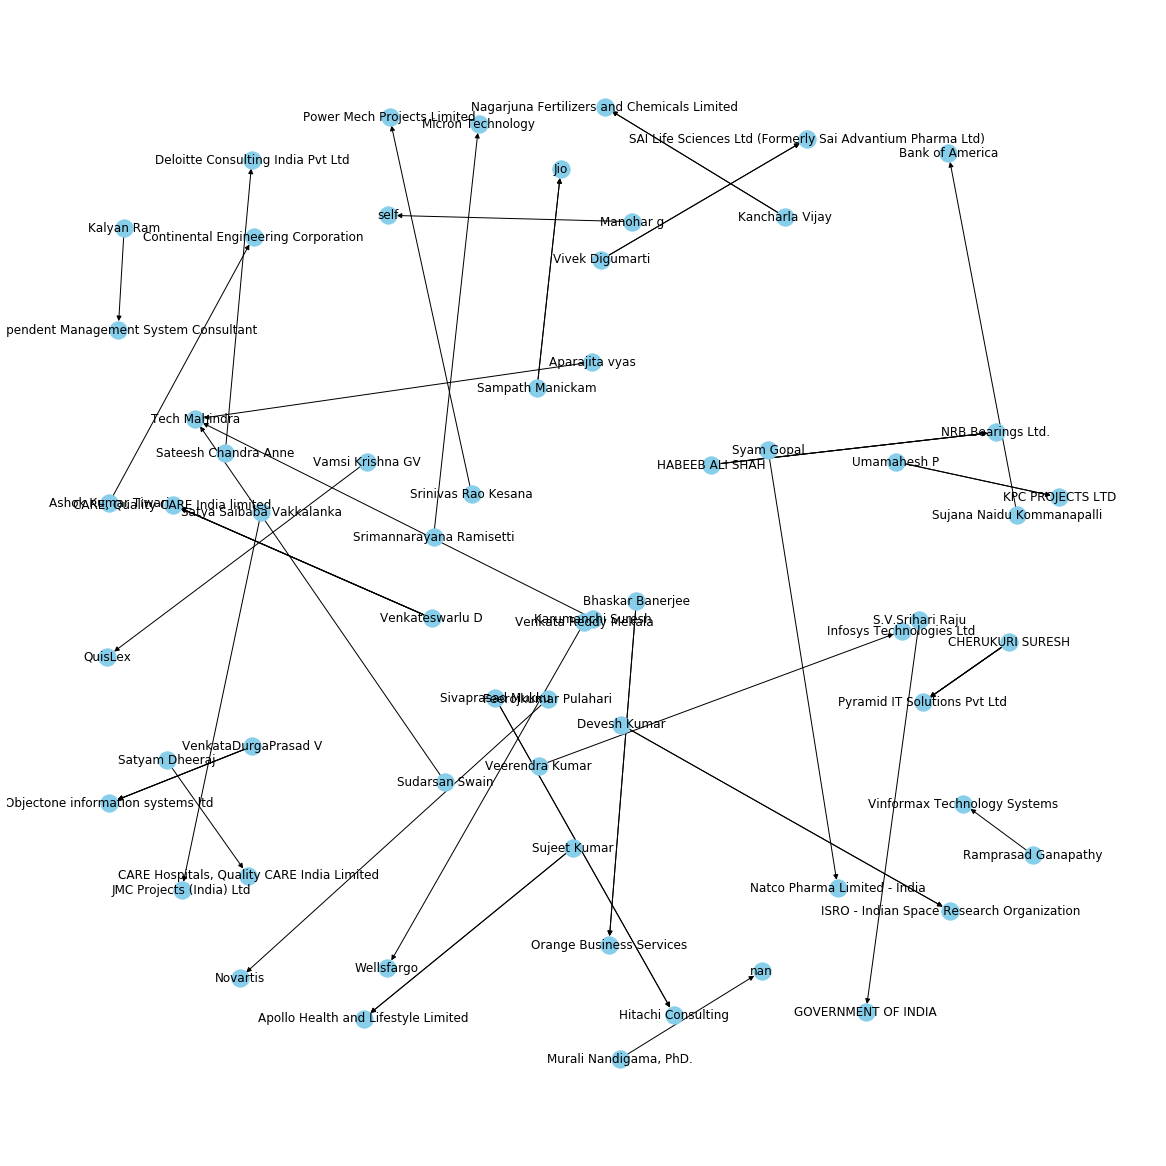

In [ ]:
plt.figure(figsize=(16,16))

pos = nx.spring_layout(G,k=0.30,iterations=20)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()